# Primer ejercicio.

Asignación de tareas en una empresa que ofrece servicios tecnológicos

## Parámetros

L = proyecto ** no se usa para este ejercicio

j = tarea

n = total de horas de tarea j

i = empleado 

t = tipo de empleado (practicante, analista jr, analista sr, experto, gerente)

m = número total de empleados

Qi = tiempo total disponible en un mes para trabajador i (8 horas empleados y 5 paracticantes, 5 días a la semana, 4 semanas)

ai = costo fijo ( 630 practicantes, 16,108 empleados nuevos)

djk = tiempo requerido para hacer tarea (tiempo en horas)

Cijk = costo de asignar a empleado i la tarea k (costo por hora de empleado tipo t por (djk) tiempo requerido para tarea k)

## Variables

yi = valor de 1 si se decide contratar a empleado i, 0 de lo contrario

Xijk = valor de 1 si se asigna a empleado i tarea j la kecimavez, 0 de lo contrario. 

## Restricciones
1. Todas las tareas requeridad para proyecto L deben de ser realizadas por un solo empleado
2. La suma de los tiempos de trabajador i considerando todas las tareas adignadad, deben de ser menor al tiempo disponible de trabajador i. 
3. No se pueden ralizar asignaciónes negativas. 



In [ ]:
!pip install gurobipy
import gurobipy as gp
from gurobipy import GRB

def showModel(m):
    m.write("tmp.lp")
    with open("tmp.lp", "r") as f:
        print(f.read())

In [ ]:
asignacion = ["i1,j1","i1,j2","i1,j3","i1,j4",
              "i2,j1","i2,j2","i2,j3","i2,j4",
              "i3,j1","i3,j2","i3,j3","i3,j4",
              "i4,j1","i4,j2","i4,j3","i4,j4",
              "i5,j1","i5,j2","i5,j3","i5,j4"] #asignaciones posibles de empleados i a tareas j

n = 4 # tareas
m = 5 # empleados

cij = [[12, 13, 1000, 1000], #costo de empleado 1 para tarea j1 -j4
      [16, 24, 1000, 1000], #costo de empleado 2 para tarea j1 -j4
      [18, 27, 9, 1000],#costo de empleado 3 para tarea j1 -j4
      [24, 36, 12, 24], #costo de empleado 4 para tarea j1 -j4
      [30, 45, 15, 30]] #costo de empleado 5 para tarea j1 -j4

Qi = [60, 80, 80, 80, 80] #Oferta o tiempo dispobible de empleados en horas
dj = [100, 40, 120, 120] #Demanda o tiempo requerido por el total de tareas j en horas

mod = gp.Model("Modelo de asignación")

x = mod.addVars(range(m), range(n), vtype="c", name = "x") #variable tareas tipo continua


mod.setObjective(sum(cij[i][j]*x[i,j] for i in range(m) for j in range (n)), GRB.MINIMIZE)

mod.addConstrs((x.sum(i,"*") <= Qi[i] for i in range(m)), name="Oferta de Horas")
mod.addConstrs((x.sum("*",j) == dj[j] for j in range(n)), name="Demanda de Horas")

mod.optimize()
mod.printAttr("x")
showModel(mod)
mod.printAttr("ObjVal")
#print(mod.ObjVal)

In [1]:
import pandas as pd
import numpy as np
#Graficar
import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sns 
from pandas.plotting import table 
#Dividir en conjunto de prueba y entrenamiento
from sklearn.model_selection import train_test_split
#PAra la regresion 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
#Para comparar performance 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
#Para el pre procesamiento de los datos
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Limpieza de base de datos

## Limpieza base de datos del personal

In [2]:
#1 hacerun dataframe de los documentos mensuales del personal 
HC1 = pd.read_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\ETEC\HC/1. HC Noviembre 2022.csv', usecols = ["RacfID","Job Level grade"])
HC2 = pd.read_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\ETEC\HC/2. HC Diciembre 2022.csv', usecols = ["RacfID","Job Level grade"])
HC3 = pd.read_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\ETEC\HC/3. HC Enero 2023.csv', usecols = ["RacfID","Job Level grade"])
HC4 = pd.read_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\ETEC\HC/4. HC February 2023.csv', usecols = ["RacfID","Job Level grade"])
HC5 = pd.read_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\ETEC\HC/5. HC Marzo 2023.csv', usecols = ["RacfID","Job Level grade"])
HC6 = pd.read_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\ETEC\HC/6. HC Abril 30 2023.csv', usecols = ["RacfID","Job Level grade"])
HC7 = pd.read_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\ETEC\HC/7. HC Mayo 2023.csv', usecols = ["RacfID","Job Level grade"])
HC8 = pd.read_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\ETEC\HC/8. HC Junio 2023.csv', usecols = ["RacfID","Job Level grade"])
HC9 = pd.read_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\ETEC\HC/9. HC Julio 2023.csv', usecols = ["RacfID","Job Level grade"])
HC10 = pd.read_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\ETEC\HC/10. HC Agosto 2023.csv', usecols = ["RacfID","Job Level grade"])
HC11 = pd.read_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\ETEC\HC/11. HC Septiembre 2023.csv', usecols = ["RacfID","Job Level grade"])
HC12 = pd.read_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\ETEC\HC/12. HC Octubre 2023.csv', usecols = ["RacfID","Job Level grade"])

In [3]:
HC1T = pd.read_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\ETEC\HC/1. HC Noviembre 2022.csv')
HC2T = pd.read_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\ETEC\HC/2. HC Diciembre 2022.csv')
HC3T = pd.read_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\ETEC\HC/3. HC Enero 2023.csv')
HC4T = pd.read_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\ETEC\HC/4. HC February 2023.csv')
HC5T = pd.read_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\ETEC\HC/5. HC Marzo 2023.csv')
HC6T = pd.read_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\ETEC\HC/6. HC Abril 30 2023.csv')

HC1T.info()
HC2T.info()
HC3T.info()
HC4T.info()
HC5T.info()
HC6T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Employee Type                         847 non-null    object 
 1   Person ID                             721 non-null    float64
 2   Name - LFM                            847 non-null    object 
 3   RacfID                                847 non-null    object 
 4   Manager RacfID                        847 non-null    object 
 5   Manager                               847 non-null    object 
 6   Cost Center                           847 non-null    object 
 7   Employee Status                       721 non-null    object 
 8   Hiring Date                           721 non-null    object 
 9   Seniority                             721 non-null    float64
 10  Job Level grade                       847 non-null    object 
 11  Gender             

In [4]:
#Revisamos la info
HC1.info()
HC2.info()
HC3.info()
HC4.info()
HC5.info()
HC6.info()
HC7.info()
HC8.info()
HC9.info()
HC10.info()
HC11.info()
HC12.info()
#HC7.describe()
#HC8.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RacfID           847 non-null    object
 1   Job Level grade  847 non-null    object
dtypes: object(2)
memory usage: 13.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RacfID           861 non-null    object
 1   Job Level grade  861 non-null    object
dtypes: object(2)
memory usage: 13.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RacfID           862 non-null    object
 1   Job Level grade  862 non-null    object
dtypes: object(2)
memory usage: 13.6+ KB
<class 'pandas.core.frame

In [5]:
#Agregar una columna donde se indique el mes que corresponde el archivo de personal
HC1.insert(0, 'Mes', '1')
HC2.insert(0, 'Mes', '2')
HC3.insert(0, 'Mes', '3')
HC4.insert(0, 'Mes', '4')
HC5.insert(0, 'Mes', '5')
HC6.insert(0, 'Mes', '6')
HC7.insert(0, 'Mes', '7')
HC8.insert(0, 'Mes', '8')
HC9.insert(0, 'Mes', '9')
HC10.insert(0, 'Mes', '10')
HC11.insert(0, 'Mes', '11')
HC12.insert(0, 'Mes', '12')

In [6]:
#Revisamos la info
HC1.info()
HC2.info()
HC3.info()
HC4.info()
HC5.info()
HC6.info()
HC7.info()
HC8.info()
HC9.info()
HC10.info()
HC11.info()
HC12.info()
#HC7.describe()
#HC8.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Mes              847 non-null    object
 1   RacfID           847 non-null    object
 2   Job Level grade  847 non-null    object
dtypes: object(3)
memory usage: 20.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Mes              861 non-null    object
 1   RacfID           861 non-null    object
 2   Job Level grade  861 non-null    object
dtypes: object(3)
memory usage: 20.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Mes              862 non-null    object
 1   RacfID          

In [7]:
#A los datos les asignamos el tipo "objeto" ya que son descriptivos no numericos 
HC1 = HC1.astype({"Mes":"object","RacfID":"object","Job Level grade":"object"})
HC2 = HC2.astype({"Mes":"object","RacfID":"object","Job Level grade":"object"})
HC3 = HC3.astype({"Mes":"object","RacfID":"object","Job Level grade":"object"})
HC4 = HC4.astype({"Mes":"object","RacfID":"object","Job Level grade":"object"})
HC5 = HC5.astype({"Mes":"object","RacfID":"object","Job Level grade":"object"})
HC6 = HC6.astype({"Mes":"object","RacfID":"object","Job Level grade":"object"})
HC7 = HC7.astype({"Mes":"object","RacfID":"object","Job Level grade":"object"})
HC8 = HC8.astype({"Mes":"object","RacfID":"object","Job Level grade":"object"})
HC9 = HC9.astype({"Mes":"object","RacfID":"object","Job Level grade":"object"})
HC10 = HC10.astype({"Mes":"object","RacfID":"object","Job Level grade":"object"})
HC11 = HC11.astype({"Mes":"object","RacfID":"object","Job Level grade":"object"})
HC12 = HC12.astype({"Mes":"object","RacfID":"object","Job Level grade":"object"})

In [8]:
#Revisamos la info
HC1.info()
HC2.info()
HC3.info()
HC4.info()
HC5.info()
HC6.info()
HC7.info()
HC8.info()
HC9.info()
HC10.info()
HC11.info()
HC12.info()
#HC7.describe()
#HC8.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Mes              847 non-null    object
 1   RacfID           847 non-null    object
 2   Job Level grade  847 non-null    object
dtypes: object(3)
memory usage: 20.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Mes              861 non-null    object
 1   RacfID           861 non-null    object
 2   Job Level grade  861 non-null    object
dtypes: object(3)
memory usage: 20.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Mes              862 non-null    object
 1   RacfID          

In [9]:
#Eliminar espacios y convertir todo en mayusculas
HC1['RacfID'].str.upper().replace("'" , "")
HC2['RacfID'].str.upper().replace("'" , "")
HC3['RacfID'].str.upper().replace("'" , "")
HC4['RacfID'].str.upper().replace("'" , "")
HC5['RacfID'].str.upper().replace("'" , "")
HC6['RacfID'].str.upper().replace("'" , "")
HC7['RacfID'].str.upper().replace("'" , "")
HC8['RacfID'].str.upper().replace("'" , "")
HC9['RacfID'].str.upper().replace("'" , "")
HC10['RacfID'].str.upper().replace("'" , "")
HC11['RacfID'].str.upper().replace("'" , "")
HC12['RacfID'].str.upper().replace("'" , "")


0       JA15070
1       ESZ34MA
2       B19DII6
3       AA21150
4       EUIENA3
         ...   
1066    Q2M6H6W
1067    QB7MIF3
1068    JW1I47E
1069    DVBIE9J
1070    EI8H3T2
Name: RacfID, Length: 1071, dtype: object

In [11]:
#Revisamos la info
HC1.info()
HC2.info()
HC3.info()
HC4.info()
HC5.info()
HC6.info()
HC7.info()
HC8.info()
HC9.info()
HC10.info()
HC11.info()
HC12.info()
#HC7.describe()
#HC8.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Mes              847 non-null    object
 1   RacfID           847 non-null    object
 2   Job Level grade  847 non-null    object
dtypes: object(3)
memory usage: 20.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Mes              861 non-null    object
 1   RacfID           861 non-null    object
 2   Job Level grade  861 non-null    object
dtypes: object(3)
memory usage: 20.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Mes              862 non-null    object
 1   RacfID          

In [12]:
#Para hacer omogenios los datos vamos a eliminar los ceros que van al inicio de un valor
HC1['Job Level grade']=HC1['Job Level grade'].apply(lambda x: x[1:] if x.startswith('0') else x)
HC2['Job Level grade']=HC2['Job Level grade'].apply(lambda x: x[1:] if x.startswith('0') else x)
HC3['Job Level grade']=HC3['Job Level grade'].apply(lambda x: x[1:] if x[0]=="0" else x)
HC4['Job Level grade']=HC4['Job Level grade'].apply(lambda x: x[1:] if x.startswith('0') else x)
HC5['Job Level grade']=HC5['Job Level grade'].apply(lambda x: x[1:] if x.startswith('0') else x)
HC6['Job Level grade']=HC6['Job Level grade'].apply(lambda x: x[1:] if x.startswith('0') else x)
HC7['Job Level grade']=HC7['Job Level grade'].apply(lambda x: x[1:] if x.startswith('0') else x)
HC8['Job Level grade']=HC8['Job Level grade'].apply(lambda x: x[1:] if x.startswith('0') else x)
HC9['Job Level grade']=HC9['Job Level grade'].apply(lambda x: x[1:] if x[0]=="0" else x)
HC10['Job Level grade']=HC10['Job Level grade'].apply(lambda x: x[1:] if x.startswith('0') else x)
HC11['Job Level grade']=HC11['Job Level grade'].apply(lambda x: x[1:] if x.startswith('0') else x)
HC12['Job Level grade']=HC12['Job Level grade'].apply(lambda x: x[1:] if x[0]=="0" else x)


#Eliminar espacios en blanco
HC1['Job Level grade'].replace(" " , "")
HC2['Job Level grade'].replace(" " , "")
HC3['Job Level grade'].replace(" " , "")
HC4['Job Level grade'].replace(" " , "")
HC5['Job Level grade'].replace(" " , "")
HC6['Job Level grade'].replace(" " , "")
HC7['Job Level grade'].replace(" " , "")
HC8['Job Level grade'].replace(" " , "")
HC9['Job Level grade'].replace(" " , "")
HC10['Job Level grade'].replace(" " , "")
HC11['Job Level grade'].replace(" " , "")
HC12['Job Level grade'].replace(" " , "")

0       7
1       6
2       6
3       7
4       8
       ..
1066    1
1067    1
1068    1
1069    1
1070    1
Name: Job Level grade, Length: 1071, dtype: object

In [13]:
HC1.info()
HC2.info()
HC3.info()
HC4.info()
HC5.info()
HC6.info()
HC7.info()
HC8.info()
HC9.info()
HC10.info()
HC11.info()
HC12.info()
HC7.describe()
HC8.describe()
HC9.describe()
HC7.head()
HC8.head()
HC9.head()
HC8.sample(5)
HC8.sample(5)
HC3.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Mes              847 non-null    object
 1   RacfID           847 non-null    object
 2   Job Level grade  847 non-null    object
dtypes: object(3)
memory usage: 20.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Mes              861 non-null    object
 1   RacfID           861 non-null    object
 2   Job Level grade  861 non-null    object
dtypes: object(3)
memory usage: 20.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Mes              862 non-null    object
 1   RacfID          

,Mes,RacfID,Job Level grade
177,3,RD84116,7
409,3,WT298WR,6
861,3,UY1IS35,1
340,3,BR06120,7
108,3,I1BH1RJ,8


Como la infromación de los empleados es confidencial, se reliza el procesamiento de los datos donde se remplaza la columna de RacfID (que es el número personal del empleado de la empresa) y se remplaza por un número seriado del 0 al la cuenta del último empleado, esto será un valor unico asi que lo primero a relizar es juntar la infromación de todos los meses y eliminar los valores duplicado, asi cada empleado solo tendrá un solo ID.

In [14]:
#Concatenamos el RacfID de los empleados, eliminamos columna de mes y de tipo de empleado y quitamos los duplicados del RacfID

i_Empleado = pd.concat([HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12]).drop(columns=['Mes','Job Level grade']).drop_duplicates()

#Agregamos una columna para el ID del empleado para poder mantener la confidencialidad del numero de empleado dela compañia y poder hacer el tracking de que no despida a empleados ya contratados
i_Empleado.insert(0, 'i_IDempleado', range(0,0 + len(i_Empleado)))
i_Empleado.head(1304)

,i_IDempleado,RacfID
0,0,ECNM5K5
1,1,CJIWTEU
2,2,IB6A9TQ
3,3,HRTTX7F
4,4,PUFRV3S
...,...,...
1065,1299,TIBEA46
1066,1300,Q2M6H6W
1067,1301,QB7MIF3
1068,1302,JW1I47E


In [15]:
#Revisamos info
i_Empleado.info()
i_Empleado.head(1304)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1305 entries, 0 to 1070
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   i_IDempleado  1305 non-null   int64 
 1   RacfID        1305 non-null   object
dtypes: int64(1), object(1)
memory usage: 30.6+ KB


,i_IDempleado,RacfID
0,0,ECNM5K5
1,1,CJIWTEU
2,2,IB6A9TQ
3,3,HRTTX7F
4,4,PUFRV3S
...,...,...
1065,1299,TIBEA46
1066,1300,Q2M6H6W
1067,1301,QB7MIF3
1068,1302,JW1I47E


In [16]:
#Crear un data frame con todos los df de empleados por meses
Empleados2023 =  pd.concat([HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12])

#Empleados2023.to_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\ETEC\HC/Empleados2023.csv')

In [17]:
#Revisamos info
Empleados2023.head()
Empleados2023.info()
Empleados2023.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11553 entries, 0 to 1070
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Mes              11553 non-null  object
 1   RacfID           11553 non-null  object
 2   Job Level grade  11553 non-null  object
dtypes: object(3)
memory usage: 361.0+ KB


,Mes,RacfID,Job Level grade
count,11553,11553,11553
unique,12,1305,15
top,11,CE28364,6
freq,1080,16,4825


In [18]:
#Ahora se agregar la columna del ID del empleado, y eliminar la del RacfID para mantener la confidencialidad de la infromación 

Empleados2023 = Empleados2023.merge(i_Empleado,left_on="RacfID", right_on="RacfID",how="left").drop(columns="RacfID")
Empleados2023.rename(columns = {'Job Level grade':'M_Tipo de empleado'}, inplace = True)
Empleados2023 = Empleados2023.astype({"Mes":"object","M_Tipo de empleado":"object","i_IDempleado":"object"})


In [19]:
#Quitamos espacios en balanco en el tipo de empleado
Empleados2023['M_Tipo de empleado'] = Empleados2023['M_Tipo de empleado'].str.strip()

In [20]:
#Eliminamos los datos que tienen error en tipo de empleado como el caso de "MP", "PM", "MALE" y "FEMALE"
Empleados2023 = Empleados2023[(Empleados2023['M_Tipo de empleado']!='PM') & 
                                                   (Empleados2023['M_Tipo de empleado']!='MP') & 
                                                   (Empleados2023['M_Tipo de empleado']!='FEMALE') & 
                                                    (Empleados2023['M_Tipo de empleado']!='MALE')
                                                   ]

In [21]:
#Revisar info

pd.set_option('display.max_rows', 900)
Empleados2023.info()
Empleados2023.describe()
Empleados2023.head(900)
#Empleados2023.sample(200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11494 entries, 0 to 11552
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Mes                 11494 non-null  object
 1   M_Tipo de empleado  11494 non-null  object
 2   i_IDempleado        11494 non-null  object
dtypes: object(3)
memory usage: 359.2+ KB


,Mes,M_Tipo de empleado,i_IDempleado
0,1,6,0
1,1,7,1
2,1,6,2
3,1,7,3
4,1,6,4
5,1,6,5
6,1,8,6
7,1,7,7
8,1,6,8
9,1,6,9


In [ ]:
#Descargar base de datos
#Empleados2023.to_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\ETEC\HC/Empleados2023.csv')

## Gráficas del personal

In [22]:
GurpoEmpleadoPorTipo = Empleados2023.groupby(["Mes","M_Tipo de empleado",]).i_IDempleado.count().reset_index()
GurpoEmpleadoPorTipo = GurpoEmpleadoPorTipo.astype({"Mes":"int64"})
GurpoEmpleadoPorTipo.sort_values(by=['Mes'], inplace=True)
GurpoEmpleadoPorTipo
#GurpoEmpleadoPorTipo.info()

,Mes,M_Tipo de empleado,i_IDempleado
0,1,1,125
1,1,10,5
2,1,11,1
3,1,5,34
4,1,6,357
5,1,7,226
6,1,8,80
7,1,9,18
37,2,11,1
38,2,5,34


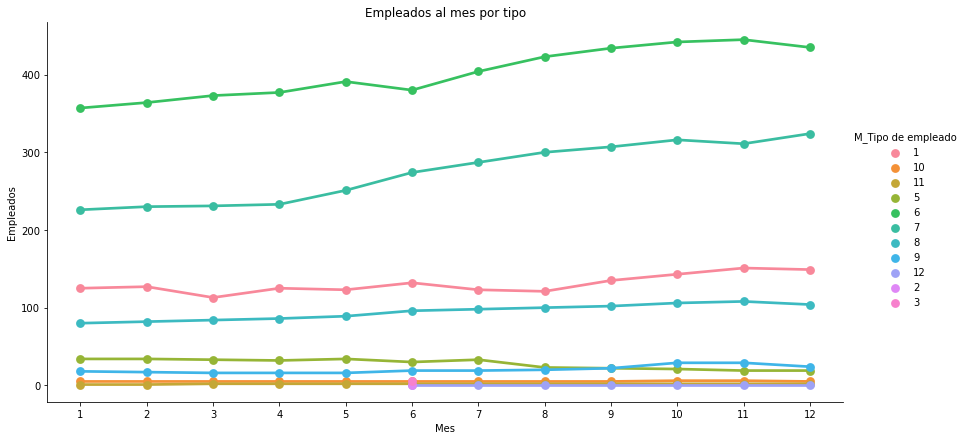

In [23]:
GraficaEmpleados = sns.catplot(data=GurpoEmpleadoPorTipo, x = ('Mes') , y= ('i_IDempleado'), hue = "M_Tipo de empleado", kind="point", legend=True, height=6, aspect=2)
GraficaEmpleados.set(xlabel='Mes',
                     ylabel='Empleados',
                     title='Empleados al mes por tipo')
GraficaEmpleados.savefig("GraficaEmpleados")
#sns.catplot(data=GurpoEmpleadoPorTipo, x = ('i_IDempleado') , y= ('M_Tipo de empleado'), hue = "Mes", kind="bar" )

In [24]:
GurpoEmpleadoPorMes = Empleados2023.groupby(["Mes"]).i_IDempleado.count().reset_index()
GurpoEmpleadoPorMes = GurpoEmpleadoPorMes.astype({"Mes":"int64"})
GurpoEmpleadoPorMes.sort_values(by=['Mes'], inplace=True)
GurpoEmpleadoPorMes


,Mes,i_IDempleado
0,1,846
4,2,860
5,3,857
6,4,876
7,5,911
8,6,946
9,7,972
10,8,995
11,9,1030
1,10,1066


In [25]:
GurpoEmpleadoPorMes.describe()

,Mes,i_IDempleado
count,12.000000,12.000000
mean,6.500000,957.833333
std,3.605551,87.313264
min,1.000000,846.000000
25%,3.750000,872.000000
50%,6.500000,959.000000
75%,9.250000,1038.250000
max,12.000000,1072.000000


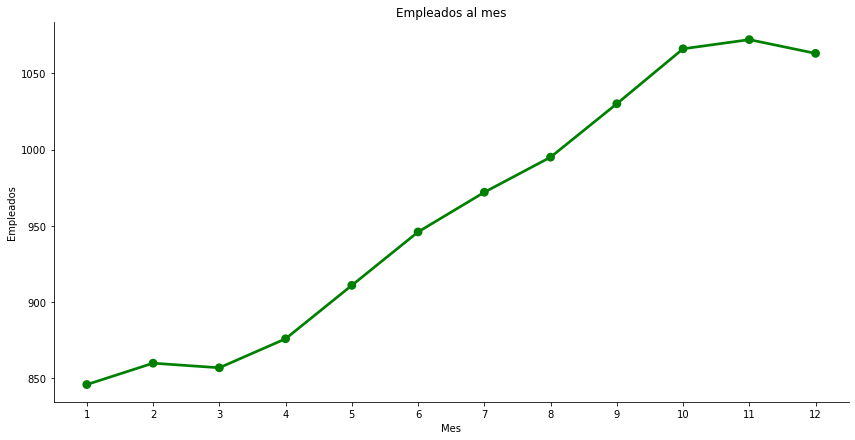

In [31]:
GraficaEmpleadoPorMes = sns.catplot(data=GurpoEmpleadoPorMes, x = ('Mes') , y= ('i_IDempleado'), color = "green" ,kind="point", legend=True, height=6, aspect=2)

GraficaEmpleadoPorMes.set(xlabel='Mes',
                     ylabel='Empleados',
                     title='Empleados al mes')
GraficaEmpleadoPorMes.savefig("GraficaEmpleadosPorMes")

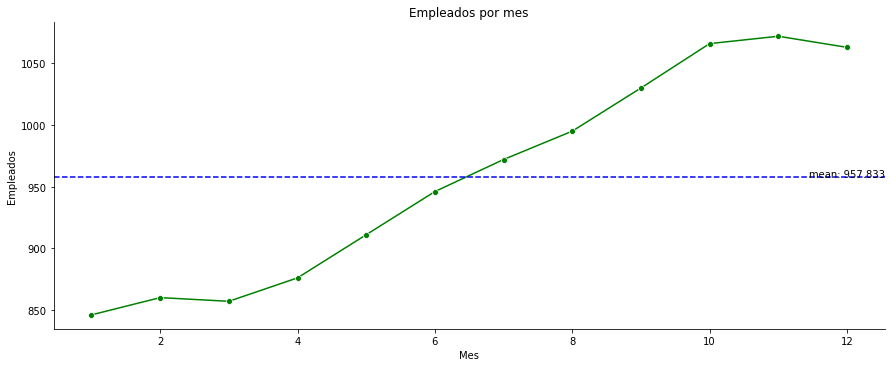

In [39]:
GraficaEmpleadoPorMes2 = sns.relplot(data=GurpoEmpleadoPorMes, kind='line', x='Mes', y='i_IDempleado', color = "green",height=5, aspect=2.5, marker = 'o', facet_kws={'sharey': True, 'sharex': False})
GraficaEmpleadoPorMes2.fig.tight_layout()


def custom(y, **kwargs):
    ym = y.mean()
    plt.axhline(ym, color= "blue", linestyle="dashed")
    plt.annotate(f"mean: {y.mean():.3f}", xy=(1,ym), 
                 xycoords=plt.gca().get_yaxis_transform(), ha="right")
    

GraficaEmpleadoPorMes2 = GraficaEmpleadoPorMes2.map(custom, 'i_IDempleado')

plt.xlabel("Mes")
plt.ylabel("Empleados")
plt.title("Empleados por mes")

GraficaEmpleadoPorMes2.savefig("GraficaEmpleadoPorMes")

In [40]:
#GurpoEmpleadoPorTipo = Empleados2023.groupby(["M_Tipo de empleado"]).count().drop(columns="Mes")
#GurpoEmpleadoPorMes = Empleados2023.groupby(["Mes"]).count().drop(columns="M_Tipo de empleado")
#GurpoEmpleadoPorTipo
#GurpoEmpleadoPorMes
#GurpoEmpleadoPorTipoPorMes = pd.merge(GurpoEmpleadoPorTipo, left_on = "i_IDempleado",GurpoEmpleadoPorMes, right_on = "i_IDempleado")
#GurpoEmpleadoPorTipoPorMes
#df1.merge(df2, left_on='lkey', right_on='rkey')


GurpoEmpleadoPorTipoSinMes = Empleados2023.groupby(["M_Tipo de empleado",]).i_IDempleado.count().reset_index()
GurpoEmpleadoPorTipoSinMes.sort_values(by=['i_IDempleado'], ascending=False, inplace=True)
GurpoEmpleadoPorTipoSinMes

GurpoEmpleadoPorTipoSinMes.insert(1,'Promedio Anual', GurpoEmpleadoPorTipoSinMes['i_IDempleado']/12)
GurpoEmpleadoPorTipoSinMes

,M_Tipo de empleado,Promedio Anual,i_IDempleado
7,6,402.083333,4825
8,7,274.166667,3290
0,1,130.583333,1567
9,8,94.583333,1135
6,5,27.833333,334
10,9,20.416667,245
1,10,5.166667,62
2,11,1.833333,22
3,12,0.583333,7
5,3,0.500000,6


## Asignación de horas

In [41]:
AsignacionHorasArchivo = pd.read_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\ETEC\TimeCard/TimeCard2023.csv')
AsignacionHorasArchivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32959 entries, 0 to 32958
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Deere/Intern          32959 non-null  object 
 1   Min. RACF_Dated       32959 non-null  object 
 2   Name                  32959 non-null  object 
 3   Employee Category     21505 non-null  object 
 4   Functional_Area       19131 non-null  object 
 5   Rate (USD/hr)         32959 non-null  object 
 6    Hours                32959 non-null  float64
 7   Invoice Amount ($)    32959 non-null  object 
 8   "MEC"                 15598 non-null  object 
 9   Unit                  32939 non-null  object 
 10  Customer_Title        28810 non-null  object 
 11  AccountCode           32959 non-null  object 
 12  DateBackup            32959 non-null  object 
 13  Dept No               31024 non-null  object 
 14  FiscalMonth           32959 non-null  int64  
 15  WeekNumber         

C:\Users\GV12028\AppData\Local\Temp\ipykernel_32232\3709973197.py:1: DtypeWarning: Columns (5,7,16,17,18,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  AsignacionHorasArchivo = pd.read_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\ETEC\TimeCard/TimeCard2023.csv')


In [42]:
AsignacionHoras = pd.read_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\ETEC\TimeCard/TimeCard2023.csv', usecols = ["Min. RACF_Dated"," Hours ","FiscalMonth","Project Name"])
AsignacionHoras.rename(columns = {'Min. RACF_Dated':'RacfID'," Hours " : "Horas","FiscalMonth":"Mes","Project Name":"Proyecto" }, inplace = True)
AsignacionHoras

,RacfID,Horas,Mes,Proyecto
0,cc8v26m,9.0,1,Cascavel
1,a2q1jan,36.0,1,Tourus
2,a2q1jan,36.0,1,R3 Canastra MY24 FB
3,a2q1jan,36.0,1,MoCo/WRP CI 0-Series MY24
4,a2q1jan,45.0,1,MoCo/WRP CI 0-Series MY24
...,...,...,...,...
32954,True Up,0.0,12,8462 _PDC_SAT - SMT - X4M1_5E Road Runner
32955,True Up,0.0,12,8465 _PDC_PPA - LT - PX_Loaders
32956,True Up,0.0,12,8505 _PDC_PPA - LT - PX_Axiomatic CAN Jumpers CID
32957,True Up,0.0,12,8509 _PDC_SAT - SMT - PX00_Tractor Programming


In [43]:
AsignacionHoras.info()
AsignacionHoras.describe()
#AsignacionHoras.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32959 entries, 0 to 32958
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RacfID    32959 non-null  object 
 1   Horas     32959 non-null  float64
 2   Mes       32959 non-null  int64  
 3   Proyecto  32959 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.0+ MB


,Horas,Mes
count,32959.000000,32959.000000
mean,54.388034,5.771686
std,63.305518,3.775799
min,-240.000000,1.000000
25%,9.640000,2.000000
50%,36.000000,5.000000
75%,67.500000,9.000000
max,1531.000000,12.000000


In [44]:
#Todo en Mayuscuñas y eliminar espacios
AsignacionHoras['RacfID'] = AsignacionHoras['RacfID'].str.upper().replace(" " , "")
AsignacionHoras

,RacfID,Horas,Mes,Proyecto
0,CC8V26M,9.0,1,Cascavel
1,A2Q1JAN,36.0,1,Tourus
2,A2Q1JAN,36.0,1,R3 Canastra MY24 FB
3,A2Q1JAN,36.0,1,MoCo/WRP CI 0-Series MY24
4,A2Q1JAN,45.0,1,MoCo/WRP CI 0-Series MY24
...,...,...,...,...
32954,TRUE UP,0.0,12,8462 _PDC_SAT - SMT - X4M1_5E Road Runner
32955,TRUE UP,0.0,12,8465 _PDC_PPA - LT - PX_Loaders
32956,TRUE UP,0.0,12,8505 _PDC_PPA - LT - PX_Axiomatic CAN Jumpers CID
32957,TRUE UP,0.0,12,8509 _PDC_SAT - SMT - PX00_Tractor Programming


In [45]:
AsignacionHoras.info()
#AsignacionHoras.describe()
#AsignacionHoras.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32959 entries, 0 to 32958
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RacfID    32959 non-null  object 
 1   Horas     32959 non-null  float64
 2   Mes       32959 non-null  int64  
 3   Proyecto  32959 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.0+ MB


In [46]:
#Eliminar un dato que no es valido para esta revision
AsignacionHoras = AsignacionHoras[(AsignacionHoras['RacfID']!='TRUE UP')]
AsignacionHoras

,RacfID,Horas,Mes,Proyecto
0,CC8V26M,9.00,1,Cascavel
1,A2Q1JAN,36.00,1,Tourus
2,A2Q1JAN,36.00,1,R3 Canastra MY24 FB
3,A2Q1JAN,36.00,1,MoCo/WRP CI 0-Series MY24
4,A2Q1JAN,45.00,1,MoCo/WRP CI 0-Series MY24
...,...,...,...,...
32088,GS10889,0.45,12,6078 _PDC_PPA - CC - NX_CI - Cat 2: Quality I...
32089,GS10889,0.45,12,6085 _PDC_PPA - CC - NX_Primis (R2 Next Gen SPS)
32090,IM10095,0.30,12,6960 _QESM_SAT - SMT - JX_Warranty analysis an...
32091,UBX4YSZ,32.00,12,8121 _PD&I_ISG-EE - M - ETEC - CF_CWBM Cost Re...


In [47]:
AsignacionHoras.info()
#AsignacionHoras.describe()
#AsignacionHoras.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30380 entries, 0 to 32092
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RacfID    30380 non-null  object 
 1   Horas     30380 non-null  float64
 2   Mes       30380 non-null  int64  
 3   Proyecto  30380 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ MB


In [48]:
AsignacionHoras = AsignacionHoras.merge(i_Empleado,left_on=("RacfID"), right_on=("RacfID"),how="left").drop(columns="RacfID")
AsignacionHoras


,Horas,Mes,Proyecto,i_IDempleado
0,9.00,1,Cascavel,354.0
1,36.00,1,Tourus,361.0
2,36.00,1,R3 Canastra MY24 FB,361.0
3,36.00,1,MoCo/WRP CI 0-Series MY24,361.0
4,45.00,1,MoCo/WRP CI 0-Series MY24,361.0
...,...,...,...,...
30375,0.45,12,6078 _PDC_PPA - CC - NX_CI - Cat 2: Quality I...,291.0
30376,0.45,12,6085 _PDC_PPA - CC - NX_Primis (R2 Next Gen SPS),291.0
30377,0.30,12,6960 _QESM_SAT - SMT - JX_Warranty analysis an...,59.0
30378,32.00,12,8121 _PD&I_ISG-EE - M - ETEC - CF_CWBM Cost Re...,306.0


In [49]:
AsignacionHoras = AsignacionHoras.astype({"Mes":"object","i_IDempleado":"object"})
AsignacionHoras.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30380 entries, 0 to 30379
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Horas         30380 non-null  float64
 1   Mes           30380 non-null  object 
 2   Proyecto      30380 non-null  object 
 3   i_IDempleado  30344 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [50]:
AsignacionHoras = AsignacionHoras.merge(Empleados2023,left_on=("i_IDempleado","Mes"), right_on=("i_IDempleado","Mes"),how="left")
AsignacionHoras

,Horas,Mes,Proyecto,i_IDempleado,M_Tipo de empleado
0,9.00,1,Cascavel,354.0,NaN
1,36.00,1,Tourus,361.0,NaN
2,36.00,1,R3 Canastra MY24 FB,361.0,NaN
3,36.00,1,MoCo/WRP CI 0-Series MY24,361.0,NaN
4,45.00,1,MoCo/WRP CI 0-Series MY24,361.0,NaN
...,...,...,...,...,...
30375,0.45,12,6078 _PDC_PPA - CC - NX_CI - Cat 2: Quality I...,291.0,NaN
30376,0.45,12,6085 _PDC_PPA - CC - NX_Primis (R2 Next Gen SPS),291.0,NaN
30377,0.30,12,6960 _QESM_SAT - SMT - JX_Warranty analysis an...,59.0,NaN
30378,32.00,12,8121 _PD&I_ISG-EE - M - ETEC - CF_CWBM Cost Re...,306.0,NaN


In [51]:
AsignacionHoras.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30380 entries, 0 to 30379
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horas               30380 non-null  float64
 1   Mes                 30380 non-null  object 
 2   Proyecto            30380 non-null  object 
 3   i_IDempleado        30344 non-null  object 
 4   M_Tipo de empleado  0 non-null      object 
dtypes: float64(1), object(4)
memory usage: 1.4+ MB


In [52]:
#Agrupar por proyectos al mes
AsignacionHorasMes = AsignacionHoras.groupby(["Mes"]).Horas.sum().round(0).reset_index()
AsignacionHorasMes 

,Mes,Horas
0,1,110938.0
1,2,121411.0
2,3,143350.0
3,4,127047.0
4,5,129595.0
5,6,158218.0
6,7,141743.0
7,8,148647.0
8,9,193562.0
9,10,155544.0


In [53]:
AsignacionHorasMes.describe()

,Mes,Horas
count,12.000000,12.000000
mean,6.500000,149381.333333
std,3.605551,27997.819663
min,1.000000,110938.000000
25%,3.750000,128958.000000
50%,6.500000,145998.500000
75%,9.250000,156553.750000
max,12.000000,206522.000000


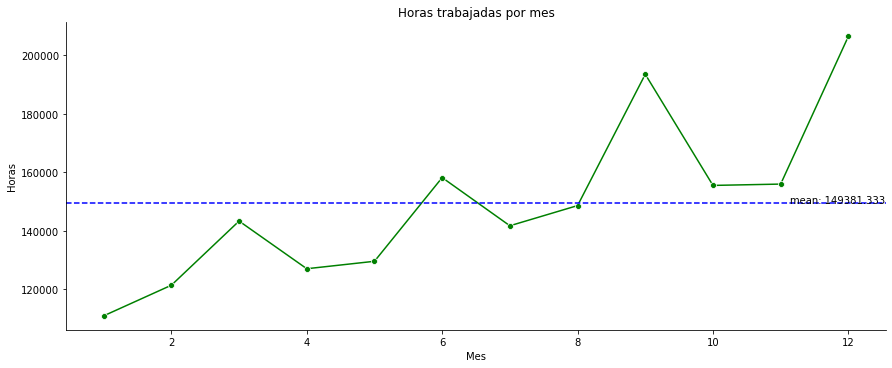

In [55]:
GraficaHorasPorMes = sns.relplot(data=AsignacionHorasMes , kind='line', x='Mes', y='Horas', color = "green",height=5, aspect=2.5, marker = 'o', facet_kws={'sharey': True, 'sharex': False})
GraficaHorasPorMes.fig.tight_layout()


def custom(y, **kwargs):
    ym = y.mean()
    plt.axhline(ym, color="blue", linestyle="dashed")
    plt.annotate(f"mean: {y.mean():.3f}", xy=(1,ym), 
                 xycoords=plt.gca().get_yaxis_transform(), ha="right")
    

GraficaHorasPorMes = GraficaHorasPorMes.map(custom, 'Horas')

plt.xlabel("Mes")
plt.ylabel("Horas")
plt.title("Horas trabajadas por mes")

GraficaHorasPorMes.savefig("GraficaHorasPorMes")

In [56]:
#Agrupar por proyectos al proyecto
AsignacionMesProyecto = AsignacionHoras.groupby(["Mes","Proyecto"]).i_IDempleado.count().reset_index()


AsignacionMesProyecto

,Mes,Proyecto,i_IDempleado
0,1,"""P-2347 4WD Loaders - Utility Class ISDP 2019-...",3
1,1,0.9 Liebherr Buckets,6
2,1,13.5L CIs,2
3,1,17G/36G Pin-on buckets,1
4,1,4.5L & 6.8L CIs,4
...,...,...,...
8224,12,8507 _PDC_PPA - LT - RX_Carver Pegasus,1
8225,12,8509 _PDC_SAT - SMT - PX00_Tractor Programming,1
8226,12,8510 _PDC_PPA - LT - PX_Millennium Loaders,1
8227,12,8524 _MF_PPA - CC - AX02_EDMONTON,1


In [57]:
Mes1Proyectos = AsignacionHoras[AsignacionHoras["Mes"] == 1].drop(columns=["i_IDempleado","M_Tipo de empleado","Horas"]).drop_duplicates()
Mes2Proyectos = AsignacionHoras[AsignacionHoras["Mes"] == 2].drop(columns=["i_IDempleado","M_Tipo de empleado","Horas"]).drop_duplicates()
Mes3Proyectos = AsignacionHoras[AsignacionHoras["Mes"] == 3].drop(columns=["i_IDempleado","M_Tipo de empleado","Horas"]).drop_duplicates()
Mes4Proyectos = AsignacionHoras[AsignacionHoras["Mes"] == 4].drop(columns=["i_IDempleado","M_Tipo de empleado","Horas"]).drop_duplicates()
Mes5Proyectos = AsignacionHoras[AsignacionHoras["Mes"] == 5].drop(columns=["i_IDempleado","M_Tipo de empleado","Horas"]).drop_duplicates()
Mes6Proyectos = AsignacionHoras[AsignacionHoras["Mes"] == 6].drop(columns=["i_IDempleado","M_Tipo de empleado","Horas"]).drop_duplicates()
Mes7Proyectos = AsignacionHoras[AsignacionHoras["Mes"] == 7].drop(columns=["i_IDempleado","M_Tipo de empleado","Horas"]).drop_duplicates()
Mes8Proyectos = AsignacionHoras[AsignacionHoras["Mes"] == 8].drop(columns=["i_IDempleado","M_Tipo de empleado","Horas"]).drop_duplicates()
Mes9Proyectos = AsignacionHoras[AsignacionHoras["Mes"] == 9].drop(columns=["i_IDempleado","M_Tipo de empleado","Horas"]).drop_duplicates()
Mes10Proyectos = AsignacionHoras[AsignacionHoras["Mes"] ==10].drop(columns=["i_IDempleado","M_Tipo de empleado","Horas"]).drop_duplicates()
Mes11Proyectos = AsignacionHoras[AsignacionHoras["Mes"] == 11].drop(columns=["i_IDempleado","M_Tipo de empleado","Horas"]).drop_duplicates()
Mes12Proyectos = AsignacionHoras[AsignacionHoras["Mes"] == 12].drop(columns=["i_IDempleado","M_Tipo de empleado","Horas"]).drop_duplicates()

Mes12Proyectos 

,Mes,Proyecto
27358,12,6765 _Emb SW_ISG-ES - CH - PCISG_Kyber
27359,12,7826 _Emb SW_ISG-ES - CH - PCISG_Dourado
27360,12,6636 _PDC_C&F - FR - TX_I000TFB/THV MECA2_DESIGN
27361,12,7629 _Emb C & PVV_ISG-ES - M - PCISG_EMB32-OS_...
27362,12,6186 _PD&I_C&F - CN - BZ_Cost Reduction Projects
27363,12,6887 _QESM_LCS-SML - LT - YK01_PDP projects Wa...
27364,12,6891 _QESM_LCS-SML - M - 90 - CSCM_WWL cost re...
27366,12,6888 _QESM_PPA - CC - FA_ETEC MX- Gutierrez
27369,12,7088 _QESM_SAT - HF - EX_Ottumwa
27373,12,7048 _QESM_C&F - RN - SE_Reman PM


In [58]:
#Concatenamos el RacfID de los empleados, eliminamos columna de mes y de tipo de empleado y quitamos los duplicados del RacfID

L_Proyecto = pd.concat([Mes1Proyectos,Mes2Proyectos,Mes3Proyectos,Mes4Proyectos,Mes5Proyectos,Mes6Proyectos,Mes7Proyectos,Mes8Proyectos,Mes9Proyectos,Mes10Proyectos,Mes11Proyectos,Mes12Proyectos]).drop_duplicates()

#Agregamos una columna para el ID del empleado para poder mantener la confidencialidad del numero de empleado dela compañia y poder hacer el tracking de que no despida a empleados ya contratados
L_Proyecto.insert(0, 'L_IDproyecto', range(0,0 + len(L_Proyecto)))
L_Proyecto.head(1304)
#L_Proyecto.describe()

,L_IDproyecto,Mes,Proyecto
0,0,1,Cascavel
1,1,1,Tourus
2,2,1,R3 Canastra MY24 FB
3,3,1,MoCo/WRP CI 0-Series MY24
5,4,1,"6D Family CI (Merit, 6E R3, 6E FT4)"
...,...,...,...
8406,1299,3,OFP Assembly. RENAME: OFP Assembly Cutters
8411,1300,3,AS CI - Cat 4 Feature Improvement
8412,1301,3,Planter TDP
8413,1302,3,Remington


In [59]:
#Agrupar por proyectos al proyecto
LProyectoagrupado = L_Proyecto.groupby(["Mes"]).L_IDproyecto.count().reset_index()
LProyectoagrupado

,Mes,L_IDproyecto
0,1,538
1,2,551
2,3,602
3,4,666
4,5,702
5,6,732
6,7,718
7,8,733
8,9,780
9,10,741


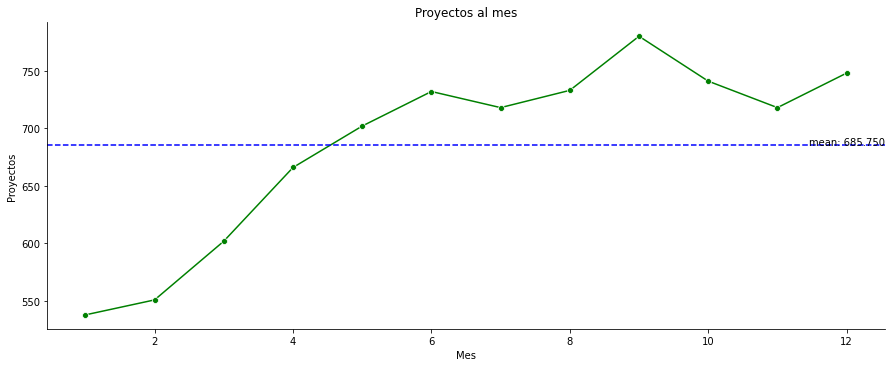

In [60]:
GraficaL_Proyecto = sns.relplot(data=LProyectoagrupado , kind='line', x='Mes', y='L_IDproyecto', color ="green", height=5, aspect=2.5, marker = 'o', facet_kws={'sharey': True, 'sharex': False})
GraficaL_Proyecto.fig.tight_layout()


def custom(y, **kwargs):
    ym = y.mean()
    plt.axhline(ym, color="blue", linestyle="dashed")
    plt.annotate(f"mean: {y.mean():.3f}", xy=(1,ym), 
                 xycoords=plt.gca().get_yaxis_transform(), ha="right")
    

GraficaL_Proyecto= GraficaL_Proyecto.map(custom, 'L_IDproyecto')

plt.xlabel("Mes")
plt.ylabel("Proyectos")
plt.title("Proyectos al mes")

GraficaL_Proyecto.savefig("GraficaL_Proyecto")

In [62]:
#Agrupar por proyectos al proyecto
#AsignacionHorasProyecto = AsignacionHoras.groupby(["Mes"]).Proyecto.count().reset_index()
#AsignacionHorasProyecto

In [64]:
#AsignacionHorasProyecto.info()
#AsignacionHorasProyecto.describe()

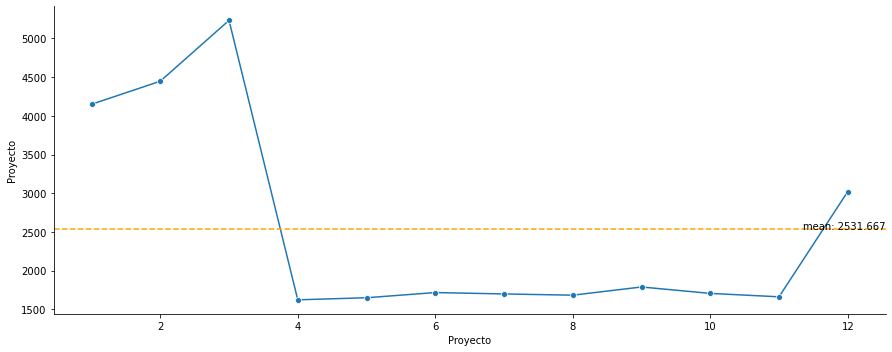

In [65]:
GraficaProyectosPorMes = sns.relplot(data=AsignacionHorasProyecto , kind='line', x='Mes', y='Proyecto', height=5, aspect=2.5, marker = 'o', facet_kws={'sharey': True, 'sharex': False})
GraficaProyectosPorMes.fig.tight_layout()


def custom(y, **kwargs):
    ym = y.mean()
    plt.axhline(ym, color="orange", linestyle="dashed")
    plt.annotate(f"mean: {y.mean():.3f}", xy=(1,ym), 
                 xycoords=plt.gca().get_yaxis_transform(), ha="right")
    

GraficaProyectosPorMes= GraficaProyectosPorMes.map(custom, 'Proyecto')

GraficaProyectosPorMes.savefig("GraficaProyectosPorMes")

In [ ]:
L_Proyecto = AsignacionHorasProyecto.drop_duplicates()
L_Proyecto 



## Tareas y horas de relización

In [ ]:
TareasHoras = pd.read_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\personal\Maestria\Datos\Datos 2/K tareas T tiempo.csv')

TareasHoras.info()
TareasHoras.describe()
TareasHoras

In [ ]:
TareasHoras.sort_values(by=['Horas'], ascending=False ,inplace=True)
TareasHoras

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
TareasHoras.plot.barh(
    y=('Horas'),
    width=0.8, ax=ax,
    xlabel="Horas",
    title="Horas de relización de tareas",
    legend=False
)
plt.xlabel("Horas")
plt.ylabel("Tareas")

plt.savefig('GraficaTareasTiempos.png')
#TareasHoras.savefig("GraficaTareasTiempos")

## Tiempo por tarea por tipo de empleado

In [ ]:
TiempoTareasEmpleado = pd.read_csv(r'C:\Users\GV12028\OneDrive-Deere&Co\OneDrive - Deere & Co\Documents\personal\Maestria\Datos\Datos 2/dkm_TiempoTareaEmpleado.csv')

TiempoTareasEmpleado.info()
TiempoTareasEmpleado.describe()
TiempoTareasEmpleado

In [ ]:
# Mapa de calor
#Datos
HTareaEmpleado = TiempoTareasEmpleado.drop("K", axis = 1)
#Etiquetas
ylabs = TiempoTareasEmpleado["K"]
xlabs = ["M1", "M2", "M3", "M4",
         "M5", "M6", "M7", "M8",
        "M9","M10","M11"]

#gRAFICA
fig, ax = plt.subplots(figsize=(15,50))
ax.imshow(HTareaEmpleado)

# Agregar las etiquetas
ax.set_xticks(np.arange(len(xlabs)), labels = xlabs)
ax.set_yticks(np.arange(len(ylabs)), labels = ylabs)

# Agregar los valores a cada celda
for i in range(len(xlabs)):
    for j in range(len(ylabs)):
        text = ax.text(j, i, round(TiempoTareasEmpleado[i, j], 1),
                       ha = "center", va = "center", color = "w")

# plt.show()

In [ ]:
def heatmap(data, row_labels, col_labels, ax = None,
            cbar_kw = {}, cbarlabel = "", **kwargs):

    if not ax:
      ax = plt.gca()

    im = ax.imshow(data, **kwargs)

    cbar = ax.figure.colorbar(im, ax = ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation = -90, va = "bottom")

    ax.set_xticks(np.arange(data.shape[1]), labels = col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels = row_labels)

    ax.tick_params(top = True, bottom = False,
                   labeltop = True, labelbottom = False)

    plt.setp(ax.get_xticklabels(), rotation = -30, ha = "right",
             rotation_mode = "anchor")

    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1] + 1) - 0.5, minor = True)
    ax.set_yticks(np.arange(data.shape[0] + 1) - 0.5, minor = True)
    ax.grid(which = "minor", color = "w", linestyle = '-', linewidth = 3)
    ax.tick_params(which =  "minor", bottom = False, left = False)

    return im, cbar


def annotate_heatmap(im, data = None, valfmt="{x:.2f}",
                     textcolors = ("black", "white"),
                     threshold = None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    kw = dict(horizontalalignment = "center",
              verticalalignment = "center")
    kw.update(textkw)

    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [ ]:
# Datos
data = TiempoTareasEmpleado.drop("K", axis = 1)

# Etiquetas
ylabs = TiempoTareasEmpleado["K"]
xlabs = ["M1", "M2", "M3", "M4",
         "M5", "M6", "M7", "M8",
        "M9","M10","M11"]
         
# Mapa de calor
fig, ax = plt.subplots()
im, cbar = heatmap(data, row_labels = xlabs, col_labels = ylabs,
                   ax = ax, cmap = "YlGn", cbarlabel = "Título")
texts = annotate_heatmap(im, valfmt = "{x:.1f}")

# plt.show()




In [ ]:
data = TiempoTareasEmpleado.drop("K", axis = 1)

def save_df_as_image(data):
    # Set background to white
    norm = matplotlib.colors.Normalize(-1,1)
    colors = [[norm(-1.0), "white"],
            [norm( 1.0), "white"]]
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
    # Make plot
    plot = sns.heatmap(data, annot=True, cmap=cmap, cbar=False)
    fig = plot.get_figure()
    fig.savefig()